# Project: 다양한 OCR 모델 비교하기

**3가지 OCR 기능 살펴봤음**
1. Google OCR API
2. kears-ocr
3. Tesseract

## Step1. 검증용 데이터셋 준비

### Library Import

In [6]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

# keras_ocr
import keras_ocr

# 테서랙트
import pytesseract
from pytesseract import Output

### datasets 
- American Sign Museume

In [7]:
tar_path = os.path.join(os.getenv("HOME"), 'aiffel', 'ocr_python', 'test')
tar_path

'/home/aiffel0042/aiffel/ocr_python/test'

In [8]:
img_paths = glob(tar_path+'/*')
img_paths    # 20개 데이터 확인

['/home/aiffel0042/aiffel/ocr_python/test/16.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/14.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/6.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/1.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/4.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/12.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/20.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/9.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/3.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/13.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/15.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/11.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/18.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/10.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/7.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/2.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/17.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/8.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/19.jpeg',
 '/home/aiffel0042/a

### data 확인
- 20개의 이미지 중 9개의 이미지를 랜덤하게 시각화

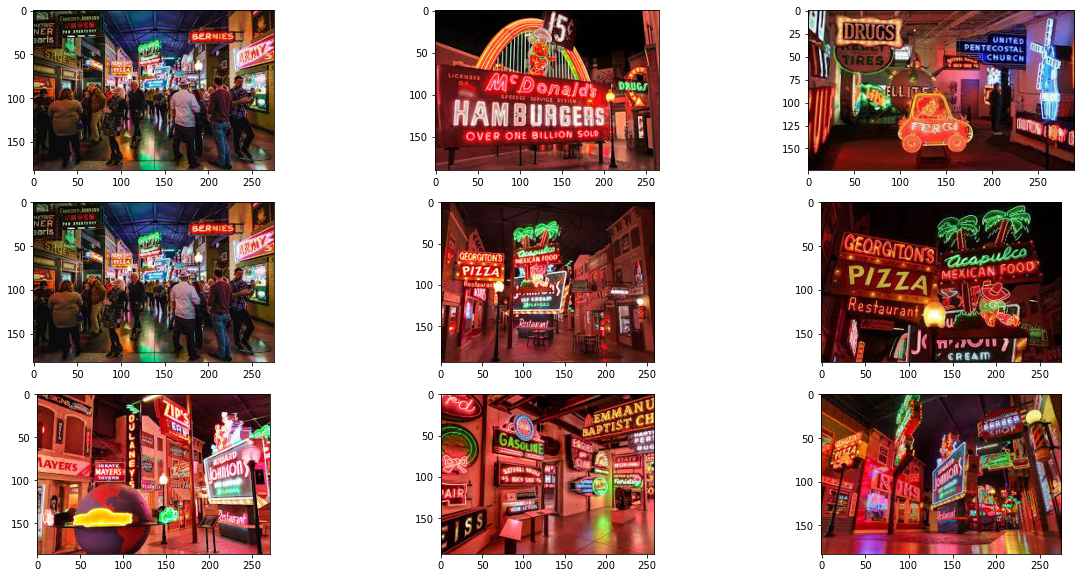

In [9]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    pil_img = Image.open(img_paths[np.random.randint(len(img_paths))])
    plt.imshow(pil_img)
plt.show()

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### 1) Google Cloud Vision API

In [10]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

### 20개의 이미지 중에서 6개를 랜덤하게 OCR 진행

In [11]:
img_paths

['/home/aiffel0042/aiffel/ocr_python/test/16.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/14.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/6.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/1.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/4.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/12.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/20.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/9.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/3.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/13.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/15.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/11.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/18.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/10.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/7.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/2.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/17.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/8.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/test/19.jpeg',
 '/home/aiffel0042/a

In [12]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

-rw-r--r-- 1 aiffel0042 aiffel0042 2322 10월 13 18:29 /home/aiffel0042/aiffel/ocr_python/my_google_api_key.json


In [13]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 함
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

# 입력 이미지 경로를 지정 
# 20개의 모든 이미지는 너무 많기 때문에 랜덤하게 5개의 사진만 진행
for i in range(5):
    print(f'{i+1}번째 이미지\n')
    detect_text(img_paths[np.random.randint(len(img_paths))])
    print("-"*20+'\n\n')

-rw-r--r-- 1 aiffel0042 aiffel0042 2322 10월 13 18:29 /home/aiffel0042/aiffel/ocr_python/my_google_api_key.json
1번째 이미지

Texts:

"O1o Stgle Kager
CAFE
N
MAYERS
( DWARD
JC HNSON'S
"

"O1o"

"Stgle"

"Kager"

"CAFE"

"N"

"MAYERS"

"("

"DWARD"

"JC"

"HNSON'S"
bounds: (242,84),(291,80),(292,99),(244,103)
--------------------


2번째 이미지

Texts:

"DRUGS
UNITED
PENTECOSTAL
CHURCH
TIRES
NELLITE
OUTION O
FERGI
"

"DRUGS"

"UNITED"

"PENTECOSTAL"

"CHURCH"

"TIRES"

"NELLITE"

"OUTION"

"O"

"FERGI"
bounds: (112,121),(162,120),(162,132),(112,133)
--------------------


3번째 이미지

Texts:

"ZIP'S
ER
S
HOBARD
JOHNSON
ANED
taurant
"

"ZIP'S"

"ER"

"S"

"HOBARD"

"JOHNSON"

"ANED"

"taurant"
bounds: (131,185),(159,189),(157,201),(129,197)
--------------------


4번째 이미지

Texts:

"ZIP'S
ER
S
HOBARD
JOHNSON
ANED
taurant
"

"ZIP'S"

"ER"

"S"

"HOBARD"

"JOHNSON"

"ANED"

"taurant"
bounds: (131,185),(159,189),(157,201),(129,197)
--------------------


5번째 이미지

Texts:

"O1o Stgle Kager
CAFE
N
MAYERS
( DWA

### 2) keras-ocr
- Tensorflow Keras API를 기반으로 이미지 안에 있는 문자를 읽는 End-to-End OCR
    - 검출 모델: CRAFT(Character Region Awarness for Text Detection)
    - 인식 모델: CRNN(Convolutional Recurrent Neural Network)    
<br/>   
- ```keras_ocr.pipeline.Pipeline()```
    - 인식을 위한 파이프라인을 생성, 이때 초기화 과정에서 불러옴
    - 검출기, 인식기를 위한 가중치 하나씩 불러옴    
<br/>   
- 파이프라인의 recognize()
    - 내부적으로 검출기와 인식기를 둠
    - 검출기로 바운딩 박스(Bounding box)를 검출
    - 인식기가 각 바운딩 박스로부터 문자를 인식하는 과정을 거침    
<br/>    
- kearas-orc은 한글 데이터셋으로 훈련되어있지 않음
- 한글 텍스트의 detection이 정상적으로 진행되지 않을 수 있음

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


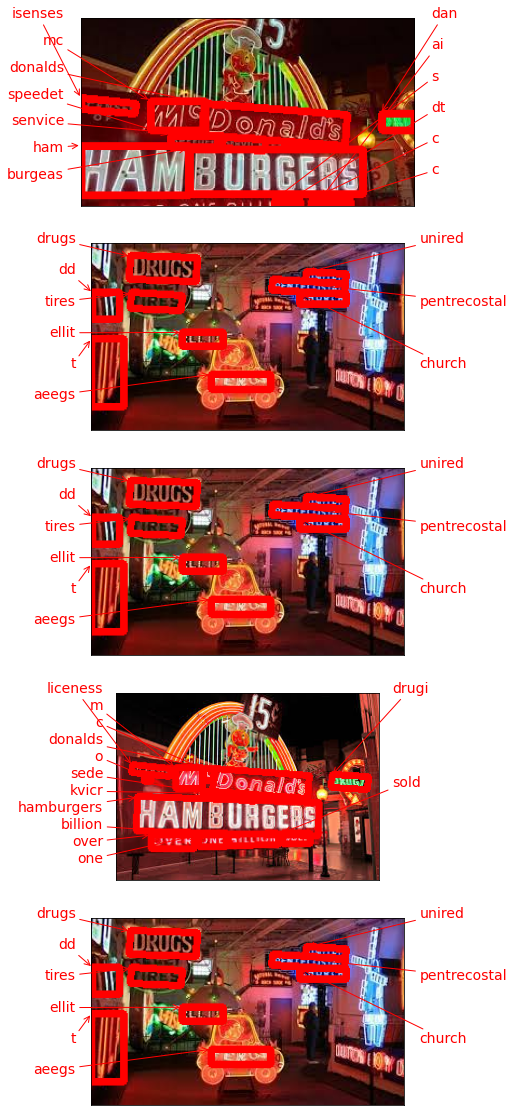

In [14]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

random_idx = np.random.choice(np.arange(len(img_paths)), 5)

image_paths = []
for i in random_idx :
    image_paths.append(img_paths[i])

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 3) Tesseract 
- 구글에서 후원하는 OCR 오픈소스 라이브러리
- 버전 4에서는 LSTM이 엔진에 추가
- 현재 한국어 포함 116개 언어를 지원

**(1) 테서랙트 설치**

In [15]:
# $ sudo apt install tesseract-ocr
# $ sudo apt install libtesseract-dev

**(2) 테서랙트 파이썬 wrapper 설치하기**
- ```Pytesseract```는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수있도록 해주는 래퍼 라이브러리(wrapper library)
- 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줌

In [16]:
# $ pip install pytesseract

**(3) 한국어 사용**
- 아래 코드에서 lang='kor'로 한국어 사용 가능
- 그 전에 테서랙트의 언어팩을 설치해야 정상적으로 동작

In [17]:
# $ sudo apt install tesseract-ocr-kor

**(4) 테서랙트로 문자 검출하고 이미지 자르기 (detection)**
- 테서랙트 사용하면 한 번에 이미지 내의 문자 검출과 인식 할 수 있음
- OCR이 이뤄지는 전체과정을 직접 거쳐보기 위해 검출 

In [22]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            #print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

- ```crop_word_regions()``` 함수는 선택한 테스트 이미지를 받아서, 문자 검출 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들을 list를 리턴하는 함수
- ```pytesseact.image_to_data()```를 사용
    - 파이썬에서 편하게 사용하기 위해서 ```pytesseract```의 ```Output```을 사용해서 결과값의 형식을 딕셔너리(```DICT```) 형식으로 설정해주게 됨
    - 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가짐
    - 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 ```PIL(pillow)```도는 ```opencv```라이브러리를 사용해 잘라(crop)서 ```cropped_image_path_list```에 담아 리턴

In [23]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + 'test/1.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
cropped_image_path_list = []
for i in range(len(image_paths)) :
    img_file_path = image_paths[i]
    if not os.path.exists(os.path.join(work_dir, f'result_{i}')) :
        os.makedirs(os.path.join(work_dir, f'result_{i}'))
    
    tmp = crop_word_regions(img_file_path, os.path.join(work_dir, f'result_{i}'))
    print(f'{i+1}번째 이미지 완료')
    cropped_image_path_list.extend(tmp)

1번째 이미지 완료


SystemError: tile cannot extend outside image

In [24]:
cropped_image_path_list

['/home/aiffel0042/aiffel/ocr_python/result_0/0000.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0001.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0002.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0003.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0004.png']

**잘린 이미지에서 단어 인식하기**
- image_to_string
    - 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나온다.    
<br/>    
- random_idx : 랜덤 인덱스    
    - 이미지에 포함된 정보가 여러 있어서 위에서 detection 하고나서 자른 이미지들중 랜덤하게 5개를 가져온다.
    - np.random.choice(..., replace=False) : 비복원 추출

In [25]:
import numpy as np
np_arr = np.arange(10)  
# array([0, 1, 2, ..., 8, 9])
random = np.random.choice(np_arr, 5, replace=False) 
# array([7, 3, 2, 6, 0])

- cropped_image_paths : 랜덤한 이미지 경로 리스트
    - 기존에 detection후에 crop한 이미지들이 저장되어 있는 리스트 cropped_image_path_list로부터 랜덤하게 경로들을 따로 리스트로 받아주었다.

In [26]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [27]:
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 5, replace=False)

# cropped_image_path_list 에서 랜덤하게 선택해서 copped_image_paths에 저장

cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

['/home/aiffel0042/aiffel/ocr_python/result_0/0001.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0002.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0004.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0000.png',
 '/home/aiffel0042/aiffel/ocr_python/result_0/0003.png']

In [29]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_pahts)



7.111013000


…

Done


- 사진들과 함께 결과 출력


Done


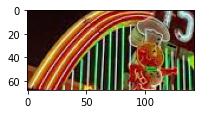


Done


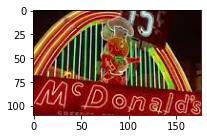

7.111013000

Done


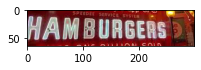


Done


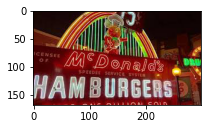

…

Done


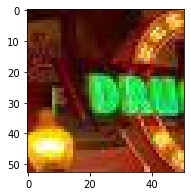

In [30]:
for i in range(5) :
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_pahts[i])
    recognize_images([cropped_image_pahts[i]])
    plt.imshow(pil_img)
    plt.show()

## Step3. 테스트 결과 정리

1. Google Cloud Vision API
- 결과
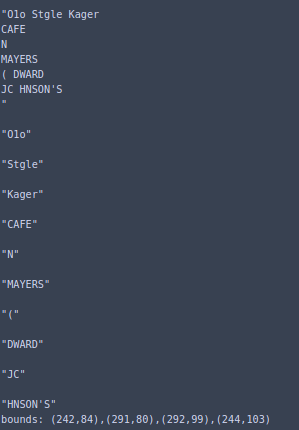
- 인식률은 좋게 나옴
- 간판의 경우 단어별로 되어있는 경우가 많은데 잘 인식함

2. keras-ocr
- 결과
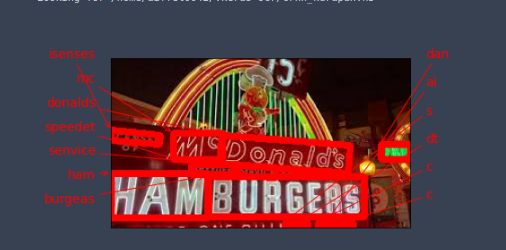
- 다소 아쉽게 오타들이 많다

**3. Tesseract**
- 결과
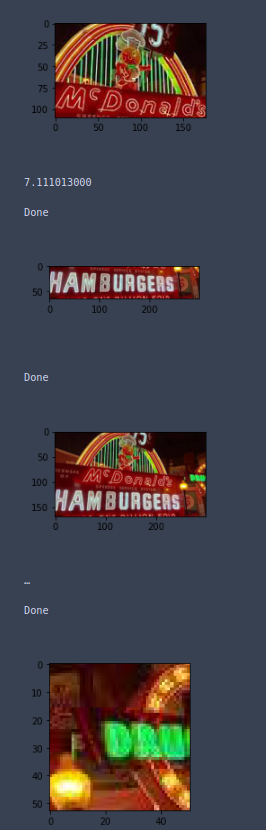
- 간판을 디텍션하여 단어별로 잘 처리함
- 영어 인식률이 좋게 나옴
- 사진에서 잘려나온 작은 글자 간판도 잘 인식함

## Step4. 결과 분석과 결론 제시

**성능 순서**
1. Google Clound Vision API
2. Tesseract
3. keras-ocr